In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')

In [3]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
# number of rows and columns
gold_data.shape

(2290, 6)

In [6]:
gold_data['Date']=pd.to_numeric(gold_data['Date'],errors="coerce")

In [7]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     0 non-null      float64
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(6)
memory usage: 107.5 KB


In [8]:
# checking the number of missing values
gold_data.isnull().sum()

Date       2290
SPX           0
GLD           0
USO           0
SLV           0
EUR/USD       0
dtype: int64

In [9]:
# getting the statistical measures of the data
gold_data.describe()

,Date,SPX,GLD,USO,SLV,EUR/USD
count,0.0,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,NaN,1654.315776,122.732875,31.842221,20.084997,1.283653
std,NaN,519.111540,23.283346,19.523517,7.092566,0.131547
min,NaN,676.530029,70.000000,7.960000,8.850000,1.039047
25%,NaN,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,NaN,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,NaN,2073.010070,132.840004,37.827501,22.882500,1.369971
max,NaN,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

1.Positive Correlation
2.Negative Correlation

In [10]:
correlation = gold_data.corr()

<Axes: >

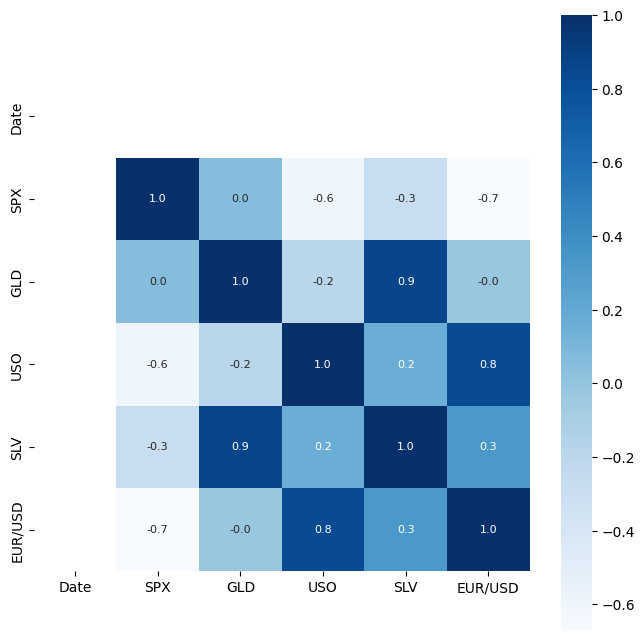

In [11]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [12]:
# correlation values of GLD
print(correlation['GLD'])

Date            NaN
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


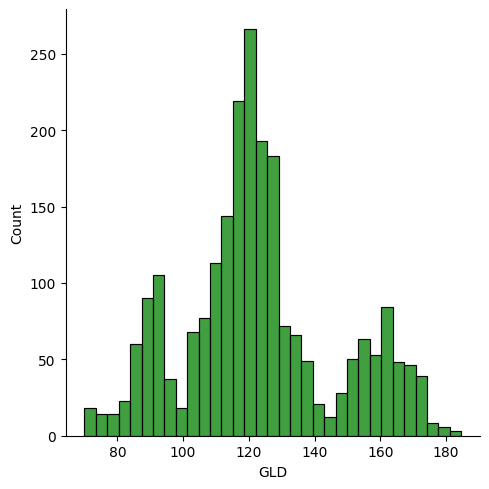

In [13]:
# checking the distribution of the GLD Price
sns.displot(gold_data['GLD'],color='green')

<Axes: xlabel='GLD', ylabel='SLV'>

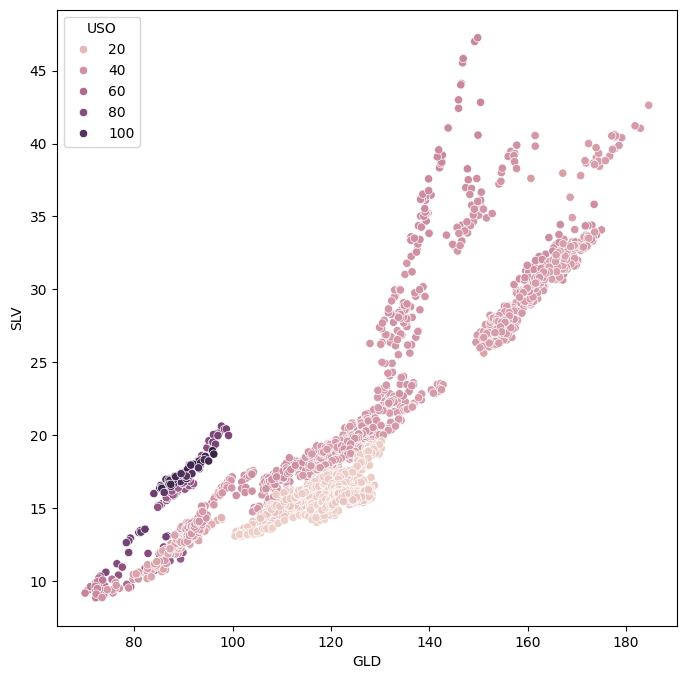

In [14]:
plt.figure(figsize = (8,8))
sns.scatterplot(x = 'GLD', y = 'SLV', hue = 'USO' ,data = gold_data)

Splitting the Features and Target

In [15]:
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [16]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [17]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting into Training data and Test Data

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training: Random Forest Regressor

In [19]:
regressor = RandomForestRegressor(n_estimators=100)

In [20]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [21]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [22]:
print(test_data_prediction)

[168.18549918  82.12509984 116.03160008 127.36480082 120.61720099
 154.71029752 150.53729839 125.96710012 117.53789883 125.95620109
 116.72290109 172.32520062 141.78039832 168.07009953 115.24009961
 117.91800056 136.87930345 169.8645008  159.62760262 160.38649971
 155.10180031 125.34640033 175.76760035 157.64330324 125.27050071
  93.93119974  77.46700017 120.34790016 119.02209918 167.48569965
  88.31930033 125.31170045  91.18070084 117.67410024 121.12179893
 136.18420017 115.86270087 115.51700045 147.93629942 107.31190104
 104.04230236  87.04939792 126.52470044 117.92169992 153.34609864
 119.55760015 108.2444005  108.0080982   93.2245006  126.99219799
  74.72260032 113.57869923 121.4263999  111.31939968 118.89429919
 121.15579922 159.7146995  167.55960052 147.04039656  85.8231985
  94.33060011  86.83979871  90.5638999  119.09910058 126.47890072
 127.55130029 169.93249965 122.31359939 117.42129902  98.26470016
 168.11050099 143.12919854 131.60420234 121.26830197 121.17939926
 119.690900

In [23]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9897450099068238


Compare the Actual Values and Predicted Values in a Plot

In [24]:
Y_test = list(Y_test)

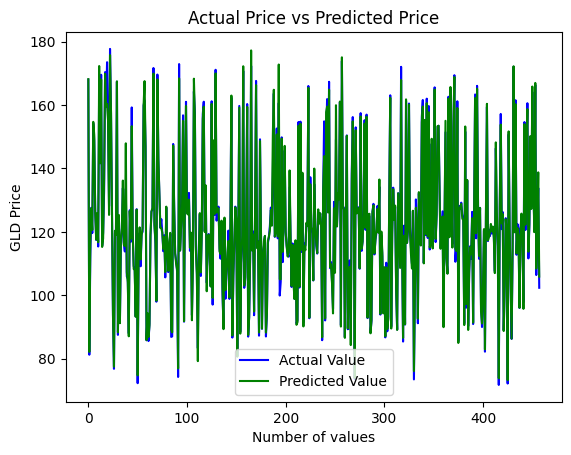

In [25]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()